In [2]:
import gpxpy
import gpxpy.gpx

import folium
import pandas as pd
import numpy as np
import haversine as hs
from IPython.display import display

import matplotlib.pyplot as plt

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

with open('I_m_fucking_crazy_but_I_m_free_.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)



route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })


route_df = pd.DataFrame(route_info)

route_df['elevation_diff'] = route_df['elevation'].diff()
print(route_df.head(10))



route_map = folium.Map(
    location=[41.100848,-124.159372],
    zoom_start=10,
    tiles='Stamen Terrain',
    width=1024,
    height=600
)
coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=5).add_to(route_map)


display(route_map)

    latitude   longitude  elevation  elevation_diff
0  37.751512 -122.429335       87.6             NaN
1  37.751515 -122.429337       87.8             0.2
2  37.751576 -122.429406       88.2             0.4
3  37.751576 -122.429441       88.2             0.0
4  37.751577 -122.429484       88.2             0.0
5  37.751579 -122.429529       88.2             0.0
6  37.751584 -122.429575       88.4             0.2
7  37.751588 -122.429622       88.4             0.0
8  37.751588 -122.429672       88.4             0.0
9  37.751586 -122.429724       88.4             0.0


In [2]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1, lon1),
        point2=(lat2, lon2),
        unit=hs.Unit.METERS
    )
    return np.round(distance, 2)

distances = [np.nan]

for i in range(len(route_df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1=route_df.iloc[i - 1]['latitude'],
            lon1=route_df.iloc[i - 1]['longitude'],
            lat2=route_df.iloc[i]['latitude'],
            lon2=route_df.iloc[i]['longitude']
        ))
        
route_df['distance'] = distances


route_df.head()

,latitude,longitude,elevation,elevation_diff,distance
0,37.751512,-122.429335,87.6,NaN,NaN
1,37.751515,-122.429337,87.8,0.2,0.38
2,37.751576,-122.429406,88.2,0.4,9.10
3,37.751576,-122.429441,88.2,0.0,3.08
4,37.751577,-122.429484,88.2,0.0,3.78


In [3]:
route_df[route_df['elevation_diff'] >= 0]['elevation_diff'].sum()

2399.8

In [4]:
route_df['distance'].sum()

177443.27

In [5]:
route_df['cum_elevation'] = route_df['elevation_diff'].cumsum()
route_df['cum_distance'] = route_df['distance'].cumsum()
route_df = route_df.fillna(0)
route_df.head(10)

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance
0,37.751512,-122.429335,87.6,0.0,0.00,0.0,0.00
1,37.751515,-122.429337,87.8,0.2,0.38,0.2,0.38
2,37.751576,-122.429406,88.2,0.4,9.10,0.6,9.48
3,37.751576,-122.429441,88.2,0.0,3.08,0.6,12.56
4,37.751577,-122.429484,88.2,0.0,3.78,0.6,16.34
5,37.751579,-122.429529,88.2,0.0,3.96,0.6,20.30
6,37.751584,-122.429575,88.4,0.2,4.08,0.8,24.38
7,37.751588,-122.429622,88.4,0.0,4.16,0.8,28.54
8,37.751588,-122.429672,88.4,0.0,4.40,0.8,32.94
9,37.751586,-122.429724,88.4,0.0,4.58,0.8,37.52


In [6]:
route_df.to_csv('route_df_elevation_distance.csv', index=False)

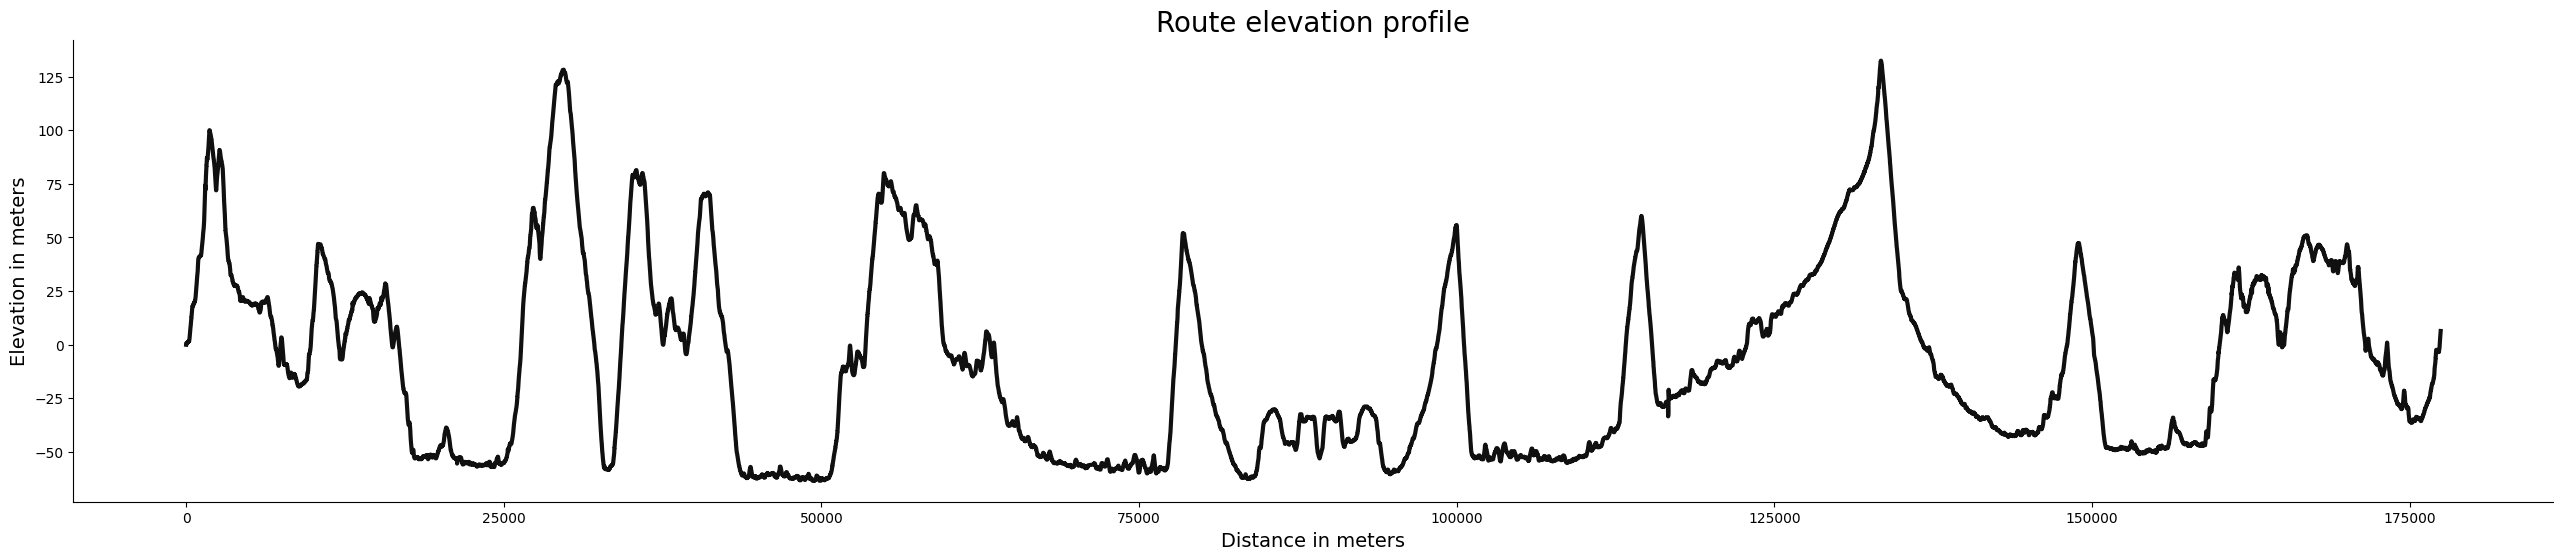

In [7]:
plt.figure(figsize=(32,6))
plt.plot(route_df['cum_distance'], route_df['cum_elevation'], color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in meters', size=14)
plt.ylabel('Elevation in meters', size=14);

In [8]:
route_df = pd.read_csv('route_df_elevation_distance.csv')
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance
0,37.751512,-122.429335,87.6,0.0,0.00,0.0,0.00
1,37.751515,-122.429337,87.8,0.2,0.38,0.2,0.38
2,37.751576,-122.429406,88.2,0.4,9.10,0.6,9.48
3,37.751576,-122.429441,88.2,0.0,3.08,0.6,12.56
4,37.751577,-122.429484,88.2,0.0,3.78,0.6,16.34


In [9]:
gradients = [np.nan]

for ind, row in route_df.iterrows(): 
    if ind == 0:
        continue
    grade = (row['elevation_diff'] / row['distance']) * 100
    if grade > 30 or grade < -30:
        gradients.append(np.nan)
    else:
        gradients.append(np.round(grade, 1))
    
gradients[:10]

/var/folders/hf/2ghllzd538173d2cr_5p7yrh0000gn/T/ipykernel_28275/4158739470.py:6: RuntimeWarning: invalid value encountered in scalar divide
  grade = (row['elevation_diff'] / row['distance']) * 100
/var/folders/hf/2ghllzd538173d2cr_5p7yrh0000gn/T/ipykernel_28275/4158739470.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  grade = (row['elevation_diff'] / row['distance']) * 100


[nan, nan, 4.4, 0.0, 0.0, 0.0, 4.9, 0.0, 0.0, 0.0]

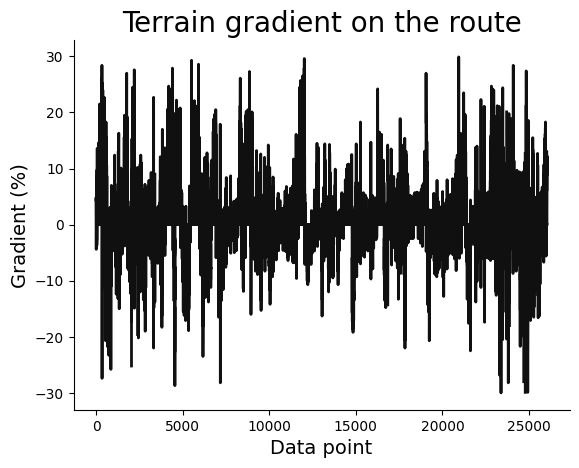

In [10]:


plt.title('Terrain gradient on the route', size=20)
plt.xlabel('Data point', size=14)
plt.ylabel('Gradient (%)', size=14)
plt.plot(np.arange(len(gradients)), gradients, lw=2, color='#101010');

In [11]:
route_df['gradient'] = gradients
route_df.head()
route_df[route_df['gradient'].isna()]
route_df['gradient'] = route_df['gradient'].interpolate().fillna(0)
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance,gradient
0,37.751512,-122.429335,87.6,0.0,0.00,0.0,0.00,0.0
1,37.751515,-122.429337,87.8,0.2,0.38,0.2,0.38,0.0
2,37.751576,-122.429406,88.2,0.4,9.10,0.6,9.48,4.4
3,37.751576,-122.429441,88.2,0.0,3.08,0.6,12.56,0.0
4,37.751577,-122.429484,88.2,0.0,3.78,0.6,16.34,0.0


In [12]:
route_df.to_csv('route_df_gradient.csv', index=False)

In [13]:
import plotly.graph_objects as go
import plotly.offline as pyo


route_df = pd.read_csv('route_df_gradient.csv')
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance,gradient
0,37.751512,-122.429335,87.6,0.0,0.00,0.0,0.00,0.0
1,37.751515,-122.429337,87.8,0.2,0.38,0.2,0.38,0.0
2,37.751576,-122.429406,88.2,0.4,9.10,0.6,9.48,4.4
3,37.751576,-122.429441,88.2,0.0,3.08,0.6,12.56,0.0
4,37.751577,-122.429484,88.2,0.0,3.78,0.6,16.34,0.0


In [14]:
route_df['gradient'].describe()

count    26037.000000
mean         0.817404
std          5.001753
min        -30.000000
25%         -1.600000
50%          0.000000
75%          3.000000
max         29.900000
Name: gradient, dtype: float64

In [15]:
bins = pd.IntervalIndex.from_tuples([
    (-30, -10),
    (-10, -5), 
    (-5, -3), 
    (-3, -1), 
    (-1, 0),
    (0, 1), 
    (1, 3), 
    (3, 5), 
    (5, 7), 
    (7, 10), 
    (10, 12), 
    (12, 15), 
    (15, 20)
], closed='left')
bins

IntervalIndex([[-30, -10), [-10, -5), [-5, -3), [-3, -1), [-1, 0) ... [5, 7), [7, 10), [10, 12), [12, 15), [15, 20)], dtype='interval[int64, left]')

In [16]:
route_df['gradient_range'] = pd.cut(route_df['gradient'], bins=bins)
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance,gradient,gradient_range
0,37.751512,-122.429335,87.6,0.0,0.00,0.0,0.00,0.0,"[0, 1)"
1,37.751515,-122.429337,87.8,0.2,0.38,0.2,0.38,0.0,"[0, 1)"
2,37.751576,-122.429406,88.2,0.4,9.10,0.6,9.48,4.4,"[3, 5)"
3,37.751576,-122.429441,88.2,0.0,3.08,0.6,12.56,0.0,"[0, 1)"
4,37.751577,-122.429484,88.2,0.0,3.78,0.6,16.34,0.0,"[0, 1)"


In [17]:
gradient_details = []

# For each unique gradient range
for gr_range in route_df['gradient_range'].unique():
    # Keep that subset only
    subset = route_df[route_df['gradient_range'] == gr_range]
    
    # Statistics
    total_distance = subset['distance'].sum()
    pct_of_total_ride = (subset['distance'].sum() / route_df['distance'].sum()) * 100
    elevation_gain = subset[subset['elevation_diff'] > 0]['elevation_diff'].sum()
    elevation_lost = subset[subset['elevation_diff'] < 0]['elevation_diff'].sum()
    
    # Save results
    gradient_details.append({
        'gradient_range': gr_range,
        'total_distance': np.round(total_distance, 2),
        'pct_of_total_ride': np.round(pct_of_total_ride, 2),
        'elevation_gain': np.round(elevation_gain, 2),
        'elevation_lost': np.round(np.abs(elevation_lost), 2)
    })

In [18]:
gradient_details_df = pd.DataFrame(gradient_details).sort_values(by='gradient_range').reset_index(drop=True)
gradient_details_df

,gradient_range,total_distance,pct_of_total_ride,elevation_gain,elevation_lost
0,"[-30.0, -10.0)",3343.42,1.88,0.0,436.4
1,"[-10.0, -5.0)",11907.60,6.71,5.0,840.4
2,"[-5.0, -3.0)",12888.62,7.26,0.2,520.6
3,"[-3.0, -1.0)",25353.69,14.29,0.0,590.4
4,"[-1.0, 0.0)",79.64,0.04,0.0,1.0
5,"[0.0, 1.0)",75967.17,42.81,8.8,3.8
6,"[1.0, 3.0)",17812.73,10.04,436.6,0.4
7,"[3.0, 5.0)",14086.33,7.94,531.4,0.4
8,"[5.0, 7.0)",7089.65,4.00,421.4,0.0
9,"[7.0, 10.0)",4101.67,2.31,344.8,0.0


In [19]:
colors = [
    '#0d46a0', '#2f3e9e', '#2195f2', '#4fc2f7',
    '#a5d6a7', '#66bb6a', '#fff59d', '#ffee58',
    '#ffca28', '#ffa000', '#ff6f00', '#f4511e', '#bf360c'
]

In [20]:
custom_text = [f'''<b>{gr}%</b> - {dst}km''' for gr, dst in zip(
    gradient_details_df['gradient_range'].astype('str'),
    gradient_details_df['total_distance'].apply(lambda x: round(x / 1000, 2))
)]

In [22]:
fig = go.Figure(
    data=[go.Bar(
        x=gradient_details_df['gradient_range'].astype(str),
        y=gradient_details_df['total_distance'].apply(lambda x: round(x / 1000, 2)),
        marker_color=colors,
        text=custom_text
    )],
    layout=go.Layout(
        bargap=0,
        title='Gradient profile of a route',
        xaxis_title='Gradient range (%)',
        yaxis_title='Distance covered (km)',
        autosize=False,
        width=1440,
        height=800,
        template='simple_white'
    )
)
fig.show()